In [1]:
# Import / install relevant Python packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datashare.csv")
df

permno      DATE         mvel1      beta    betasq     chmom  \
0         10006  19570131  8.224900e+04  1.122846  1.260784  0.047180   
1         10014  19570131  3.903375e+03  0.426734  0.182102 -0.275641   
2         10022  19570131  9.273250e+03  1.066449  1.137313 -0.025490   
3         10030  19570131  5.446588e+04  0.926038  0.857547  0.018171   
4         10057  19570131  4.025000e+04  1.247748  1.556875  0.025785   
...         ...       ...           ...       ...       ...       ...   
4117295   93423  20211231  3.144398e+06  1.923076  3.698221 -0.673385   
4117296   93426  20211231  4.326610e+05  1.224523  1.499457 -0.061462   
4117297   93427  20211231  4.092710e+06  0.887083  0.786917 -0.080295   
4117298   93434  20211231  1.130478e+05  0.512942  0.263110 -0.543760   
4117299   93436  20211231  1.149642e+09  1.504264  2.262812  0.729456   

            dolvol   idiovol    indmom     mom1m  ...     stdcf   ms  \
0         9.569953  0.025742  0.046433  0.044843  ...       NaN  NaN   
1         6.237836  0.072103  0.046433 -0.086957  ...       NaN  NaN   
2         7.008844  0.027648  0.046433 -0.060377  ...       NaN  NaN   
3         9.825337  0.021700  0.046433  0.044633  ...       NaN  NaN   
4         7.901007  0.025506  0.046433  0.086667  ...       NaN  NaN   
...            ...       ...       ...       ...  ...       ...  ...   
4117295  16.305232  0.062619  0.491455 -0.110868  ...  0.960494  3.0   
4117296  12.419552  0.033723  0.346308  0.007040  ...  0.050973  6.0   
4117297  14.884834  0.045395  0.346308  0.151667  ...  0.052512  6.0   
4117298  12.243872  0.088124  0.270005 -0.319347  ...  0.556876  2.0   
4117299  18.992410  0.081092  0.223504  0.027612  ...  0.181713  6.0   

         baspread           ill    maxret    retvol  std_dolvol   std_turn  \
0        0.013234  9.411565e-08  0.015453  0.008058    0.355638   0.460420   
1        0.033305  6.610609e-06  0.047619  0.033495    1.152126   1.169610   
2        0.016023  2.286832e-06  0.020833  0.015589    0.815777   0.679803   
3        0.015295  1.464273e-07  0.039326  0.015849    0.739302   1.333656   
4        0.005954  1.380375e-06  0.056856  0.019945    0.755510   0.410391   
...           ...           ...       ...       ...         ...        ...   
4117295  0.043829  3.698841e-10  0.073435  0.029678    0.399725   9.215947   
4117296  0.025875  1.097624e-08  0.046055  0.019302    0.481331   1.649750   
4117297  0.029966  8.593845e-10  0.131563  0.032861    0.440057   2.444487   
4117298  0.069943  1.145228e-07  0.036932  0.035858    0.968425   4.557546   
4117299  0.056249  9.679103e-13  0.084910  0.044202    0.381912  11.699841   

            zerotrade  sic2  
0        1.120996e-07  37.0  
1        9.229146e-08   NaN  
2        1.181757e-07   NaN  
3        6.126699e-08   NaN  
4        3.315790e+00   NaN  
...               ...   ...  
4117295  5.031856e-09  79.0  
4117296  3.023395e-08  36.0  
4117297  2.224496e-08  36.0  
4117298  3.155353e-08   1.0  
4117299  3.240135e-09  37.0  

[4117300 rows x 97 columns]

In [7]:
df[(df["DATE"] > 19791231) & (df["DATE"] < 20150101)].count()

permno        2851424
DATE          2851424
mvel1         2850381
beta          2576652
betasq        2576652
               ...   
retvol        2849100
std_dolvol    2740855
std_turn      2750294
zerotrade     2746588
sic2          2771942
Length: 97, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117300 entries, 0 to 4117299
Data columns (total 97 columns):
 #   Column           Dtype  
---  ------           -----  
 0   permno           int64  
 1   DATE             int64  
 2   mvel1            float64
 3   beta             float64
 4   betasq           float64
 5   chmom            float64
 6   dolvol           float64
 7   idiovol          float64
 8   indmom           float64
 9   mom1m            float64
 10  mom6m            float64
 11  mom12m           float64
 12  mom36m           float64
 13  pricedelay       float64
 14  turn             float64
 15  absacc           float64
 16  acc              float64
 17  age              float64
 18  agr              float64
 19  bm               float64
 20  bm_ia            float64
 21  cashdebt         float64
 22  cashpr           float64
 23  cfp              float64
 24  cfp_ia           float64
 25  chatoia          float64
 26  chcsho           float64
 27  chempia     

In [27]:
# Get basic descriptive statistics
df.describe()

permno          DATE         mvel1          beta        betasq  \
count  4.117300e+06  4.117300e+06  4.114230e+06  3.716736e+06  3.716736e+06   
mean   5.580153e+04  1.994807e+07  1.794745e+06  1.017846e+00  1.459436e+00   
std    2.803699e+04  1.551979e+05  1.425696e+07  6.469574e-01  1.727259e+00   
min    1.000000e+04  1.957013e+07  0.000000e+00 -7.995801e-01  0.000000e+00   
25%    2.774800e+04  1.984013e+07  2.262833e+04  5.514290e-01  3.099600e-01   
50%    6.132100e+04  1.996043e+07  9.978790e+04  9.487651e-01  9.039929e-01   
75%    8.100200e+04  2.007053e+07  5.004894e+05  1.393751e+00  1.946645e+00   
max    9.343600e+04  2.021123e+07  2.711977e+09  3.887420e+00  1.511203e+01   

              chmom        dolvol       idiovol        indmom         mom1m  \
count  3.778195e+06  3.765378e+06  3.716736e+06  4.117276e+06  4.085562e+06   
mean   1.419177e-03  1.103710e+01  6.000247e-02  1.290215e-01  9.047752e-03   
std    5.388882e-01  2.997975e+00  3.719688e-02  2.796336e-01  1.470126e-01   
min   -8.461765e+00 -3.060271e+00  0.000000e+00 -7.595030e-01 -7.365891e-01   
25%   -2.373287e-01  8.932708e+00  3.355240e-02 -3.900461e-02 -6.060606e-02   
50%   -5.599722e-03  1.091005e+01  5.051632e-02  1.052144e-01  0.000000e+00   
75%    2.317867e-01  1.311956e+01  7.656600e-02  2.557880e-01  6.584814e-02   
max    7.783077e+00  1.945995e+01  2.835521e-01  2.748655e+00  2.000000e+00   

       ...         stdcf            ms      baspread           ill  \
count  ...  1.611546e+06  2.435264e+06  4.116654e+06  3.808790e+06   
mean   ...  1.609011e+01  3.650686e+00  5.282943e-02  4.679922e-06   
std    ...  1.181806e+02  1.672222e+00  7.008496e-02  2.450043e-05   
min    ...  0.000000e+00  0.000000e+00 -4.294743e-01  0.000000e+00   
25%    ...  8.606565e-02  2.000000e+00  1.914463e-02  7.348112e-09   
50%    ...  1.471728e-01  4.000000e+00  3.249778e-02  9.658251e-08   
75%    ...  3.102902e-01  5.000000e+00  5.826552e-02  1.053550e-06   
max    ...  2.996622e+03  8.000000e+00  9.818182e-01  9.818182e-04   

             maxret        retvol    std_dolvol      std_turn     zerotrade  \
count  4.116735e+06  4.113821e+06  3.800942e+06  3.811493e+06  3.807487e+06   
mean   6.923128e-02  3.038941e-02  8.460017e-01  4.669164e+00  1.385922e+00   
std    7.056037e-02  2.531975e-02  4.104349e-01  1.493230e+01  3.404157e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  7.336618e-13   
25%    2.721088e-02  1.421338e-02  5.237257e-01  7.900201e-01  1.783985e-08   
50%    4.790512e-02  2.323816e-02  7.731108e-01  1.799523e+00  4.900303e-08   
75%    8.490562e-02  3.805866e-02  1.096922e+00  4.149823e+00  6.484889e-07   
max    9.666665e-01  2.659367e-01  3.362429e+00  7.946859e+02  2.004546e+01   

               sic2  
count  3.816941e+06  
mean   4.773581e+01  
std    1.973108e+01  
min    1.000000e+00  
25%    3.400000e+01  
50%    4.900000e+01  
75%    6.500000e+01  
max    9.900000e+01  

[8 rows x 97 columns]

In [28]:
df_sort_date_permno = df.copy()

In [29]:
# Visualize the missing values by dates
plt.figure(figsize=(96, 96))
heatmap_returns = sns.heatmap(
    df_sort_date_permno.sort_values(["DATE", "permno"]).isnull(), cbar=False
)
plt.show()

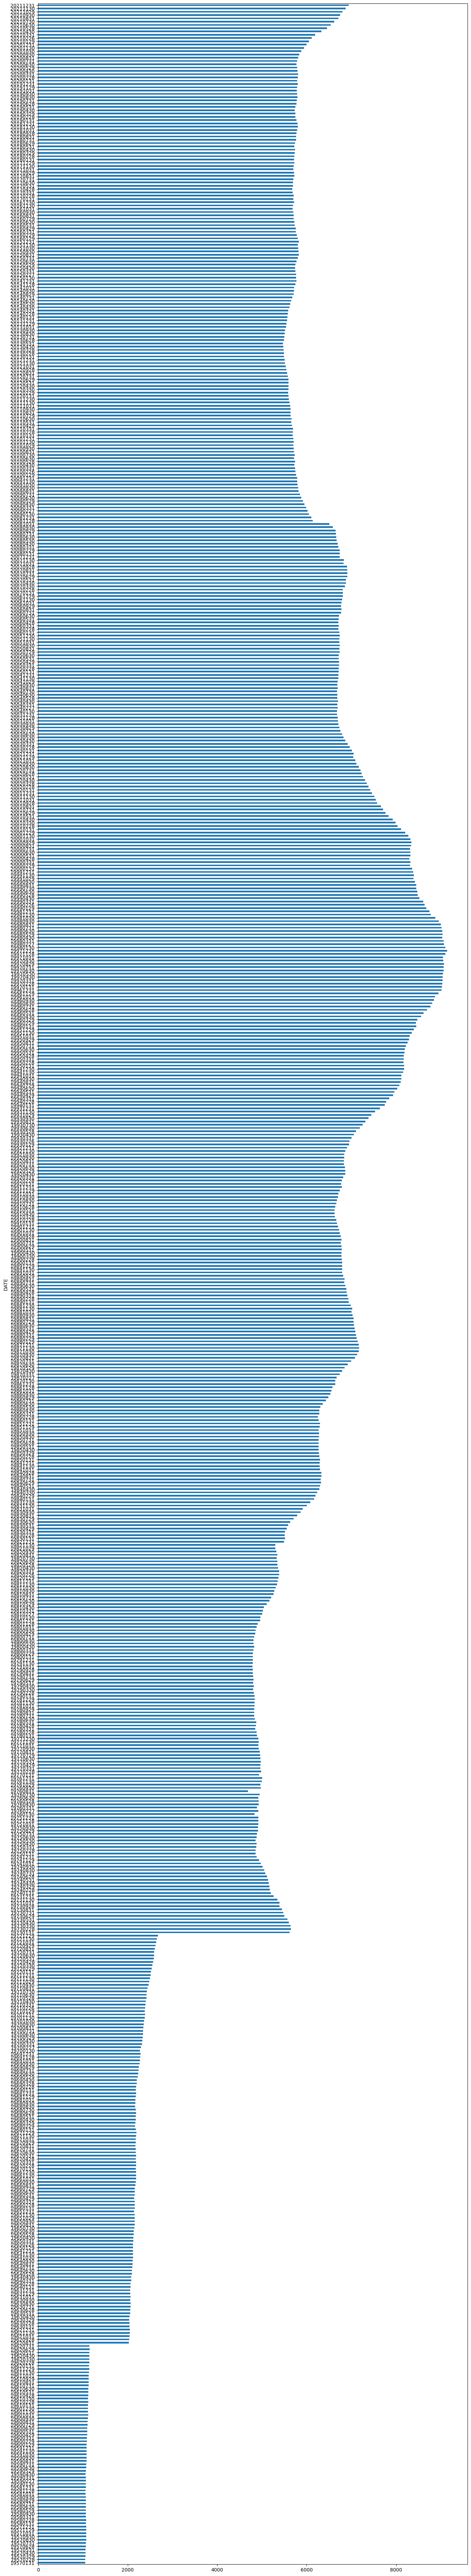

In [31]:
count_copanies_bydate = df_sort_date_permno.groupby(["DATE"]).count()["permno"]
plt.figure(figsize=(16, 96))
count_copanies_bydate.plot.barh()
plt.show()

In [32]:
# Visualize the missing values by companies
plt.figure(figsize=(96, 96))
heatmap_returns = sns.heatmap(
    df_sort_date_permno.sort_values(["permno", "DATE"]).isnull(), cbar=False
)
plt.show()

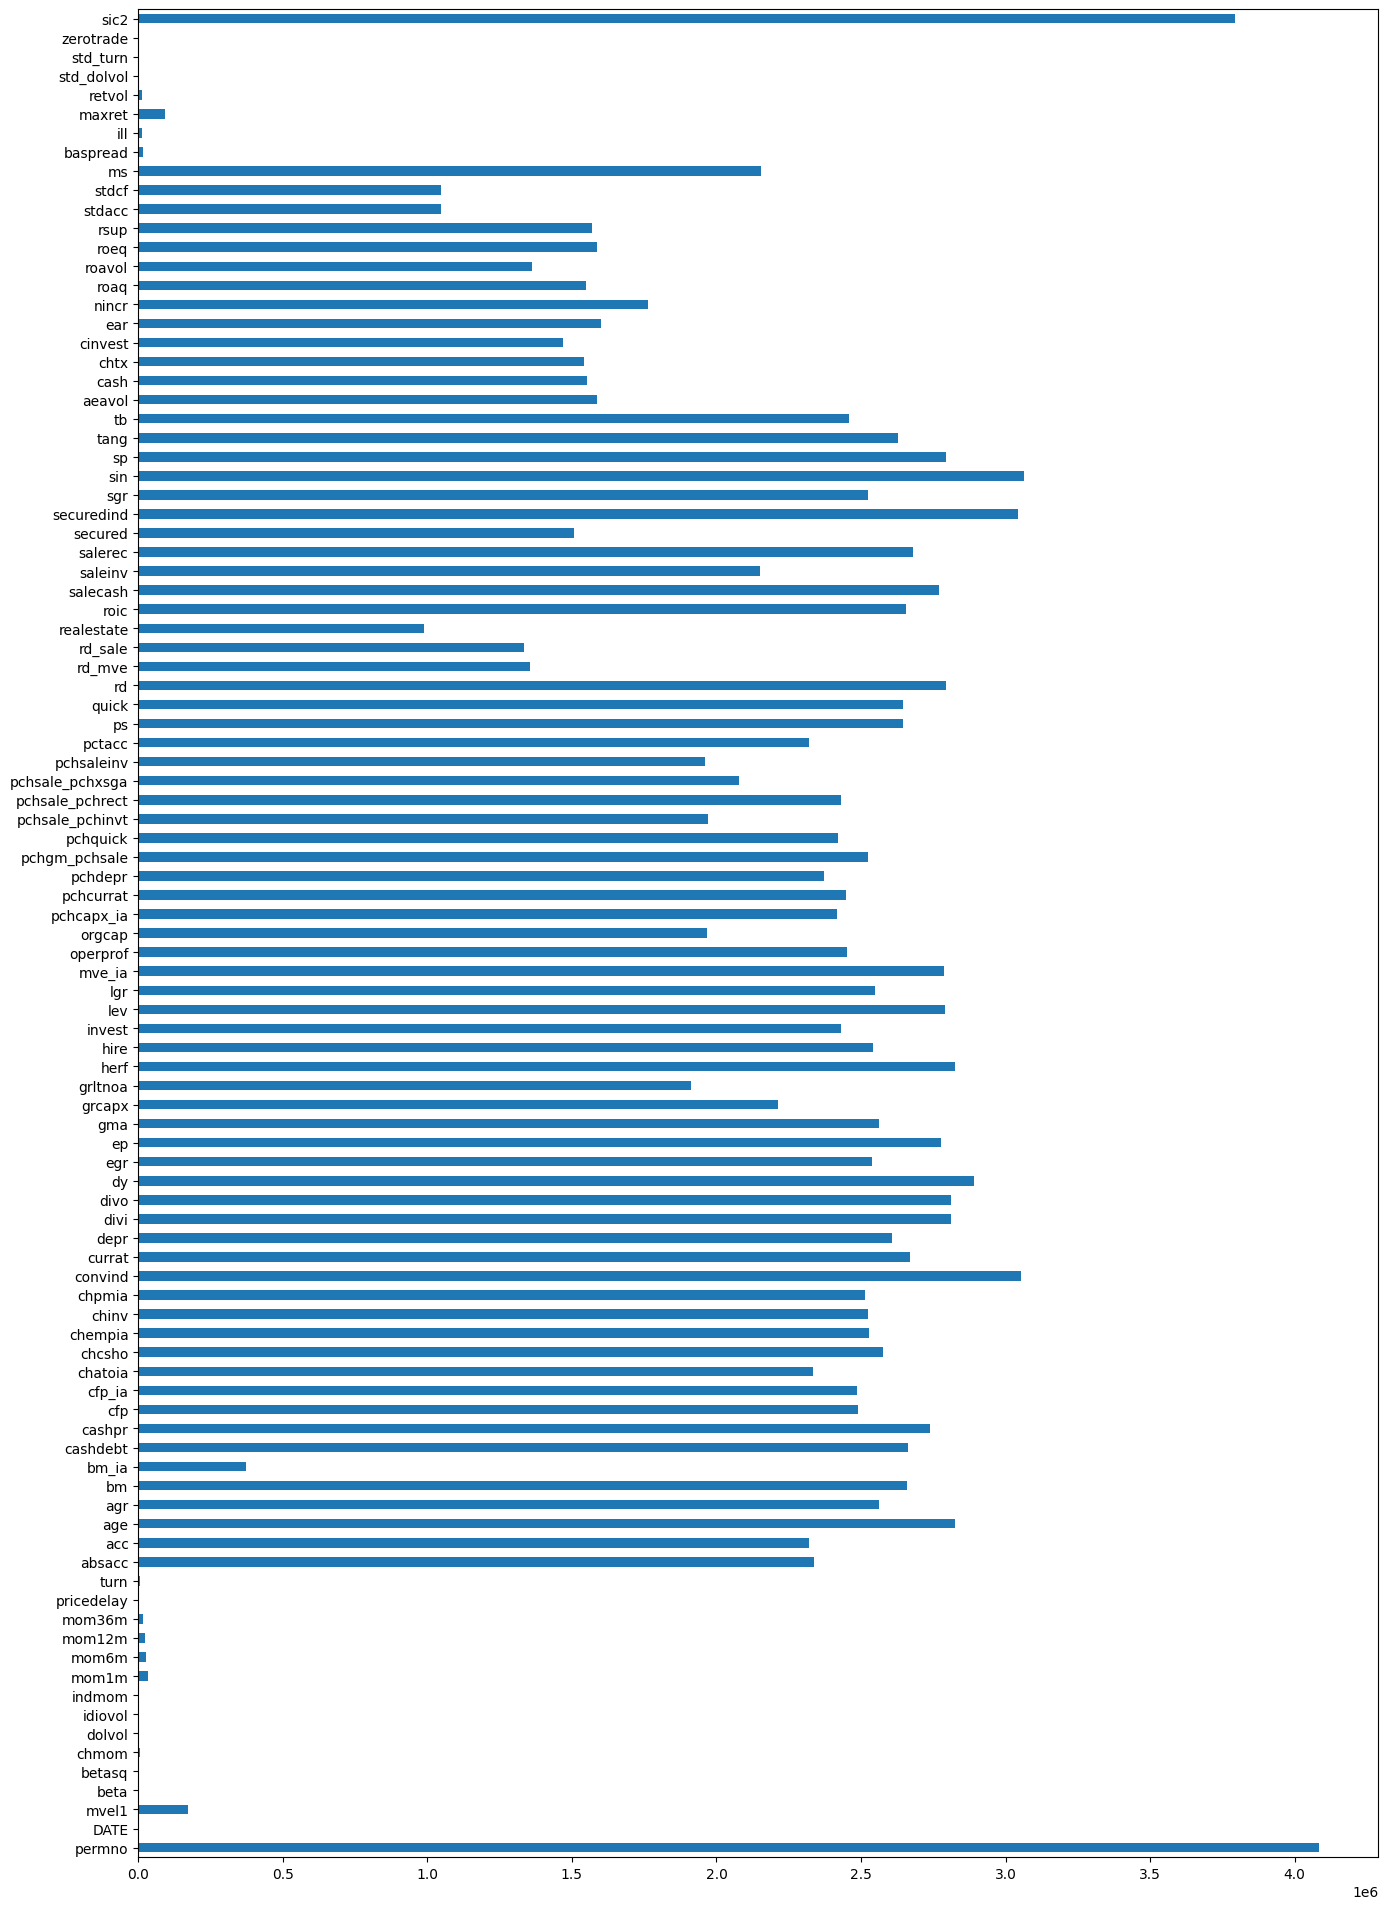

In [33]:
# Visualize the duplicate values bay companies
df_sort_date_permno = df.copy()
df_sort_date_permno = df_sort_date_permno.sort_values(["permno", "DATE"])
df_sort_date_permno_1lag = df_sort_date_permno.shift(1)


check_duplicates = df_sort_date_permno_1lag == df_sort_date_permno

count_duplicates = check_duplicates.astype(int).sum()

# Create a bar chart to visualize count_duplicates
plt.figure(figsize=(16, 24))
count_duplicates.plot.barh()
plt.show()

In [34]:
count_duplicates.sort_values()

std_dolvol         17
indmom            121
DATE              124
pricedelay        200
zerotrade         201
               ...   
securedind    3042462
convind       3054235
sin           3064691
sic2          3791966
permno        4084507
Length: 97, dtype: int64

In [35]:
# Transform the duplicates indicator (should consist of NaNs, and duplikates)
check_duplicates_and_nans = check_duplicates.astype(int)
check_duplicates_and_nans = check_duplicates_and_nans.where(
    df_sort_date_permno.isna().values != True, other=float("NaN")
)

In [36]:
# Visualize the duplicates and NAN's by companies
plt.figure(figsize=(96, 96))
heatmap_duplicates = sns.heatmap(check_duplicates_and_nans, cbar=False)
heatmap_duplicates.set_yticklabels([])
plt.show()

This plot ( sns.heatmap ) for duplicates is not exact precise ( there could be by chance to have same value end of one company and begginig of other ) but is very good. 


In [14]:
check_duplicates.astype(int).sum()

permno        4084507
DATE              124
mvel1          173495
beta              259
betasq            272
               ...   
retvol          13973
std_dolvol         17
std_turn         1547
zerotrade         201
sic2          3791966
Length: 97, dtype: int64

In [15]:
count_duplicates_and_nans = (
    check_duplicates_and_nans.where(
        df_sort_date_permno.isna().values != True, other=int(1)
    )
    .astype(int)
    .sum()
)

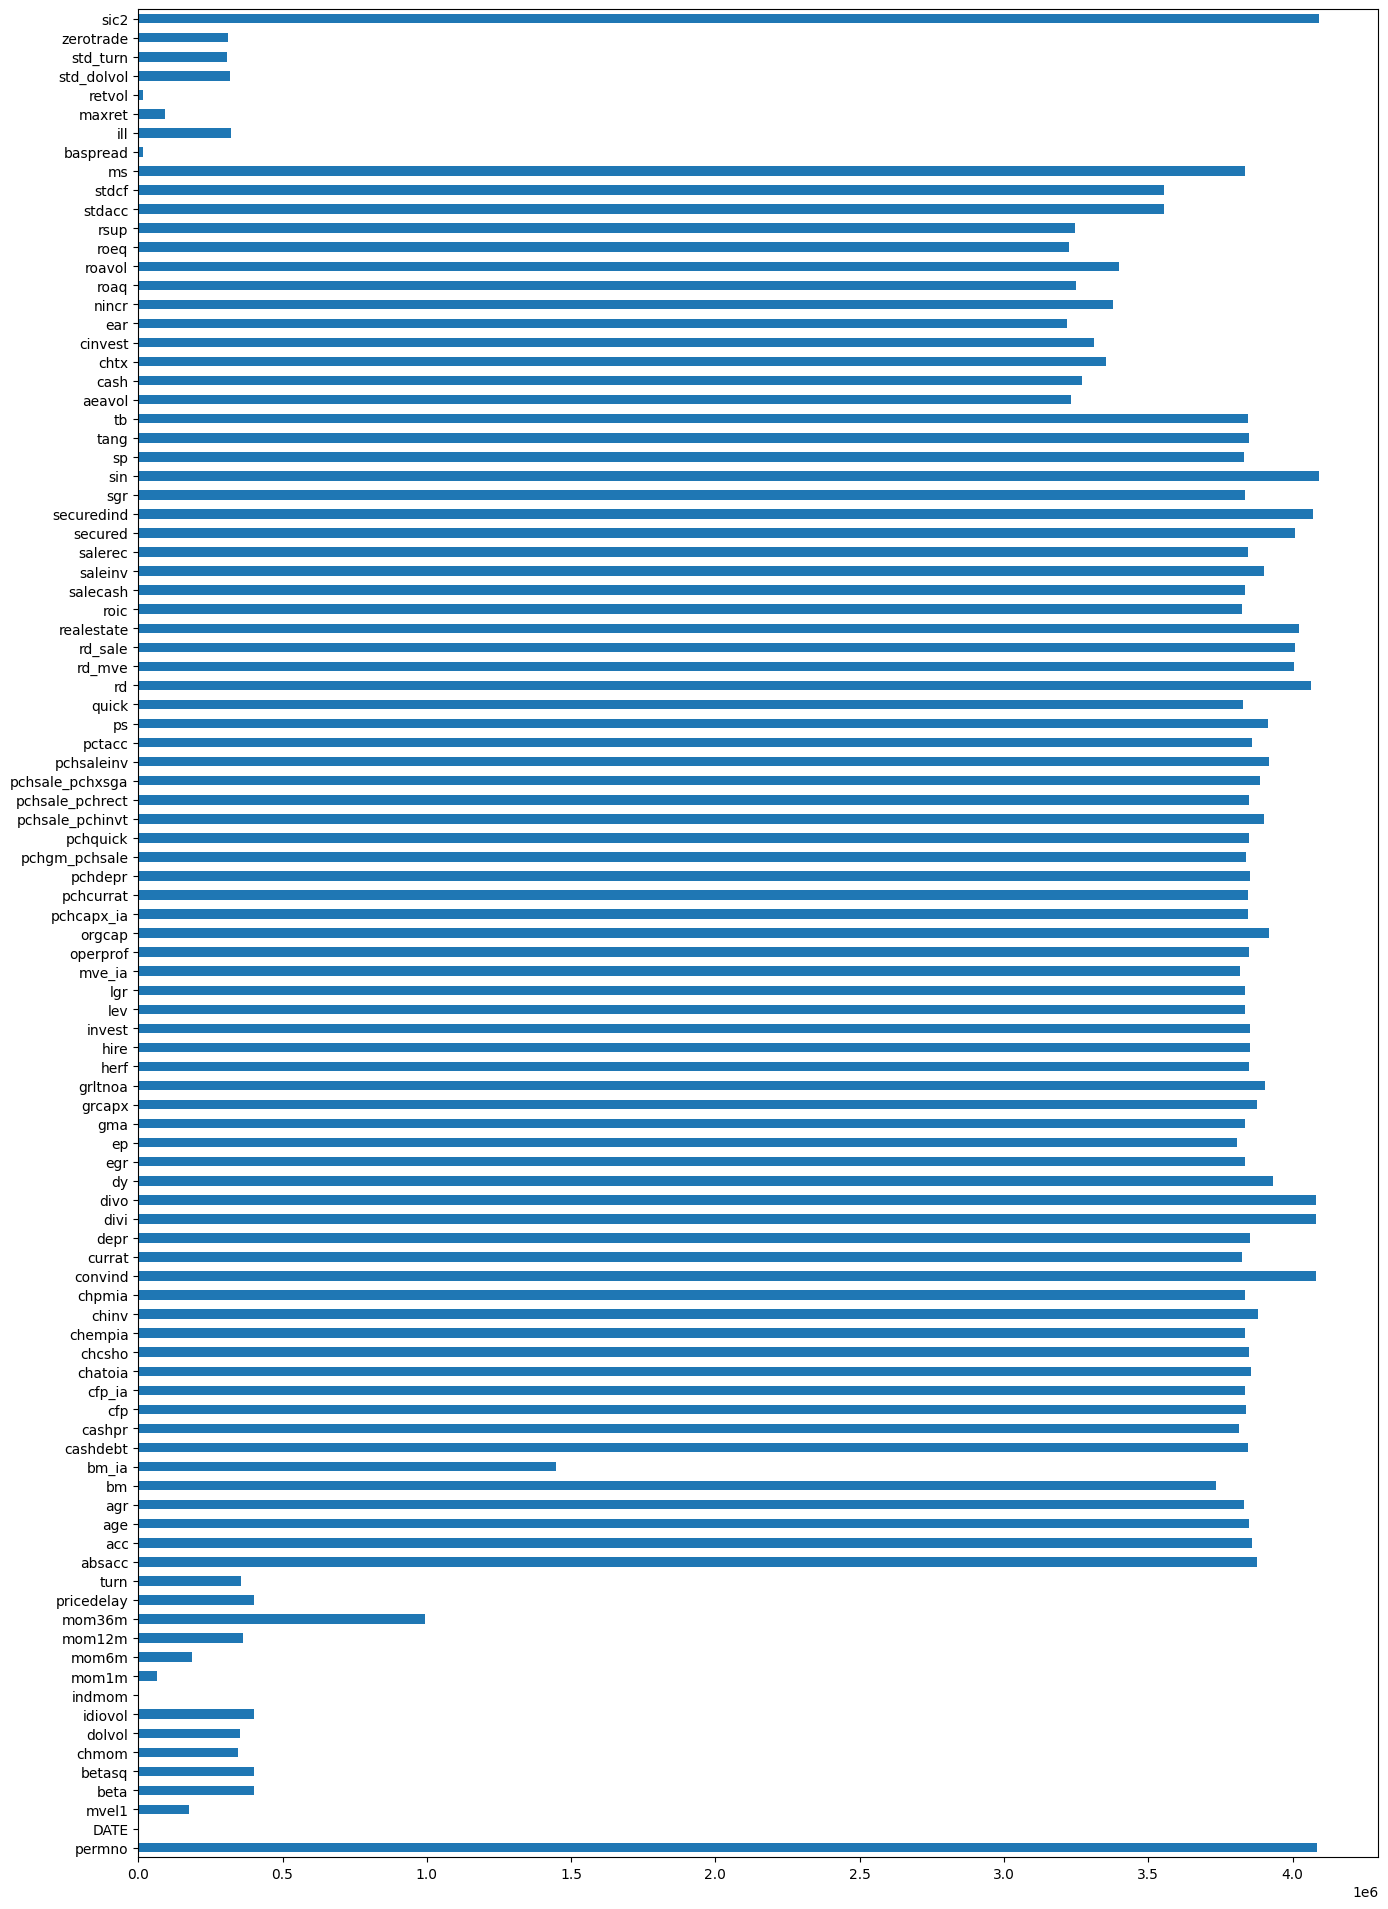

In [16]:
# Create a bar chart to visualize count_duplicates
plt.figure(figsize=(16, 24))
count_duplicates_and_nans.plot.barh()
plt.show()

In [17]:
count_duplicates_and_nans.sort_values()

DATE            124
indmom          145
baspread      16964
retvol        17452
mom1m         64220
             ...   
convind     4081135
divo        4081634
permno      4084507
sin         4091591
sic2        4092325
Length: 97, dtype: int64

In [11]:
df.isnull().sum(axis=1).sort_values()

3429752     0
3317574     0
3317572     0
2183422     0
3317568     0
           ..
380651     94
404370     94
364025     94
951274     94
788600     94
Length: 4117300, dtype: int64

<AxesSubplot: ylabel='Frequency'>

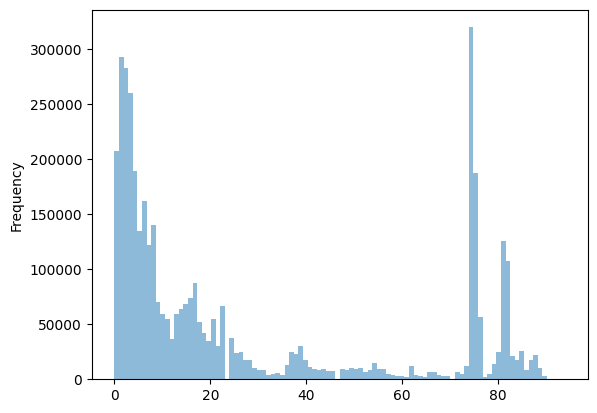

In [34]:
temp = df.isnull().sum(axis=1).sort_values()
temp.plot.hist(bins=98, alpha=0.5)

In DACHENG dataset, IPO and sue is missing ( Han is using it in 78 chosen company carasteristics).


In [12]:
df_radni = df[(df["DATE"] > 19751231) & (df["DATE"] < 20220101)]

In [13]:
df_radni = df_radni[
    [
        "DATE",
        "permno",
        "mom1m",
        "sic2",
        "absacc",
        "acc",
        "aeavol",
        "age",
        "agr",
        "baspread",
        "beta",
        "betasq",
        "bm",
        "bm_ia",
        "cash",
        "cashdebt",
        "cashpr",
        "cfp",
        "cfp_ia",
        "chatoia",
        "chcsho",
        "chempia",
        "chinv",
        "chmom",
        "chpmia",
        "chtx",
        "cinvest",
        "convind",
        "currat",
        "depr",
        "divi",
        "divo",
        "dolvol",
        "dy",
        "ear",
        "egr",
        "ep",
        "gma",
        "herf",
        "hire",
        "idiovol",
        "ill",
        "indmom",
        "invest",
        "lev",
        "lgr",
        "maxret",
        "ms",
        "mve_ia",
        "mvel1",
        "nincr",
        "operprof",
        "pchcapx_ia",
        "pchcurrat",
        "pchdepr",
        "pchgm_pchsale",
        "pchquick",
        "pchsale_pchrect",
        "pctacc",
        "pricedelay",
        "ps",
        "quick",
        "rd",
        "retvol",
        "roaq",
        "roeq",
        "roic",
        "rsup",
        "salecash",
        "salerec",
        "securedind",
        "sgr",
        "sin",
        "sp",
        "std_dolvol",
        "std_turn",
        "tang",
        "tb",
        "turn",
        "zerotrade",
    ]
]

In [14]:
df_radni.isnull().sum(axis=0).sort_values()

DATE              0
permno            0
indmom            9
maxret          324
baspread        405
             ...   
cash        1202490
rsup        1223992
ms          1228231
chtx        1287797
cinvest     1311386
Length: 80, dtype: int64

In [38]:
count_nan_proba = len(df_radni) - df_radni.count()
temp = (count_nan_proba / len(df_radni) * 100).sort_values()

In [39]:
trt = (temp > 0.15).value_counts()
trt

True     72
False     7
dtype: int64

In [41]:
count_nan_proba = len(df) - df.count()
temp = (count_nan_proba / len(df) * 100).sort_values()
trt = (temp > 0.15).value_counts()
trt

True     90
False     7
dtype: int64

In [10]:
# df_radni.to_csv('D:/USB Drive/Data/DachengXiu/df_radni.csv')